In [18]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [19]:
import os
from pathlib import Path

In [20]:
gp_imdir = Path("../2018-NEON-beetles/group_images")
gp_ims = os.listdir(gp_imdir)
len(gp_ims)

578

In [21]:
def check_close_to_white_square(roi, mean_threshold=0.6, std_tolerance=0.3, size_tolerance=0.05):
   
    height, width = roi.shape[:2]
    if abs(height - width) / max(height, width) > size_tolerance:
        # print('not square', abs(height - width) / max(height, width))
        return False

    # Normalize ROI to [0, 1] range
    roi_normalized = roi / 255.0

    # Calculate the mean color across the ROI
    mean_color = np.mean(roi_normalized, axis=(0, 1))

    # Check if the mean color is close to white
    if not np.all(mean_color > mean_threshold):
        # print('not found white', mean_color)
        return False

    # Calculate the standard deviation of color values to check uniformity
    std_color = np.std(roi_normalized, axis=(0, 1))

    # Check if the standard deviation is within tolerance (indicating uniformity)
    if np.any(std_color > std_tolerance):
        # print('not found uniformly dist', std_color)
        return False
    return True

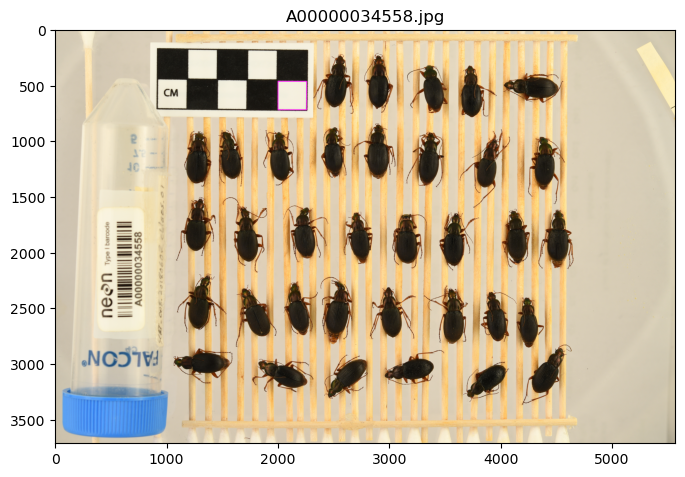

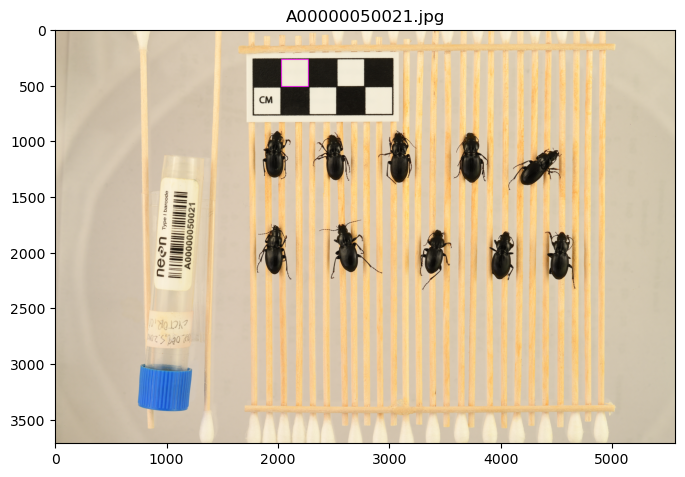

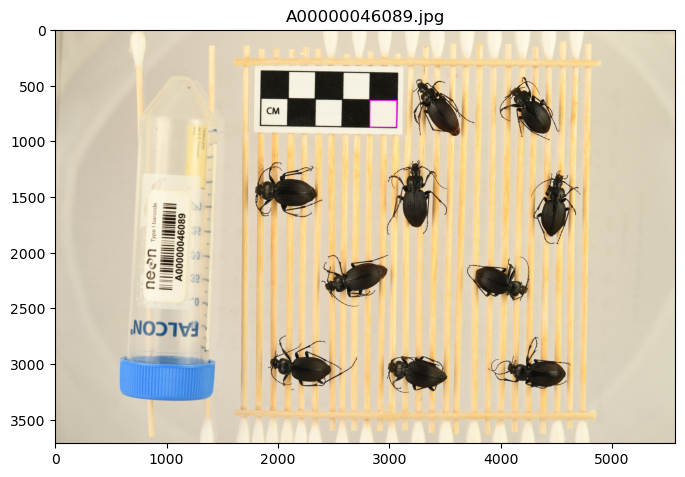

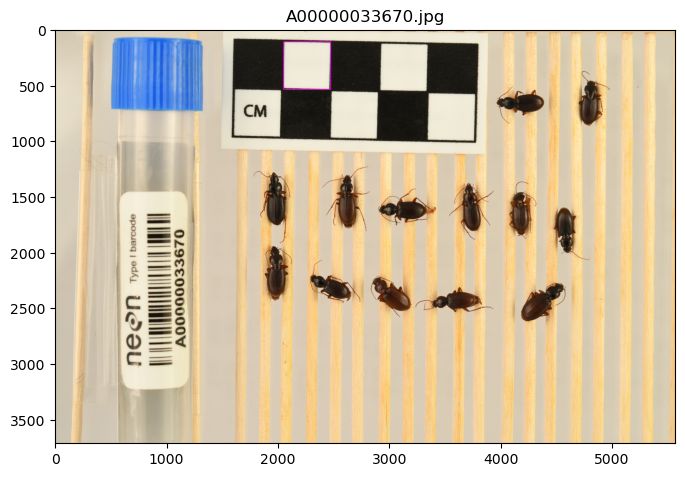

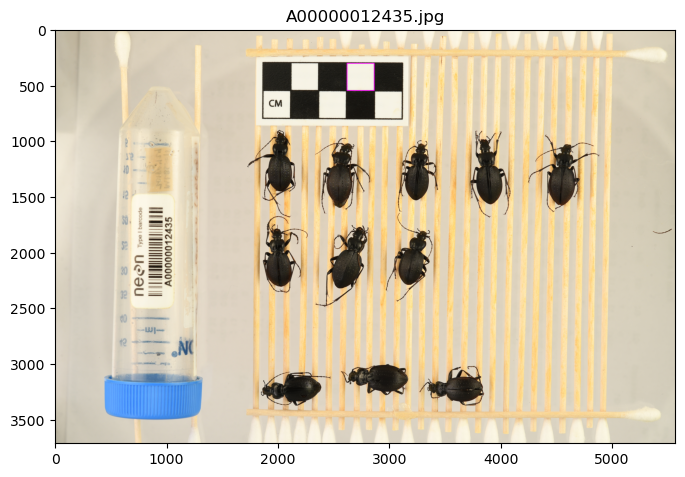

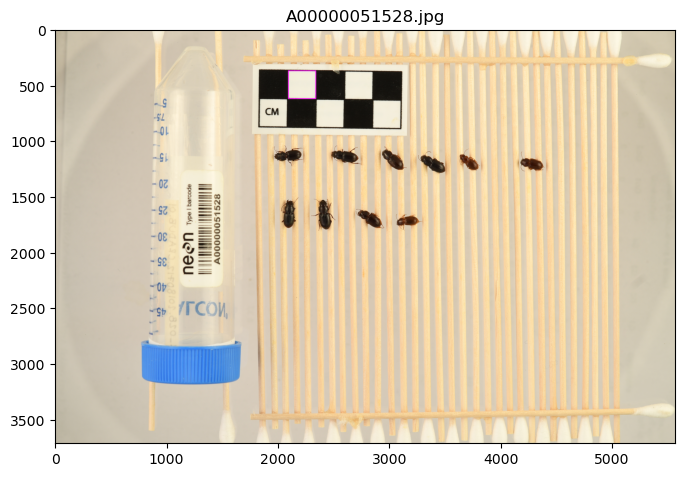

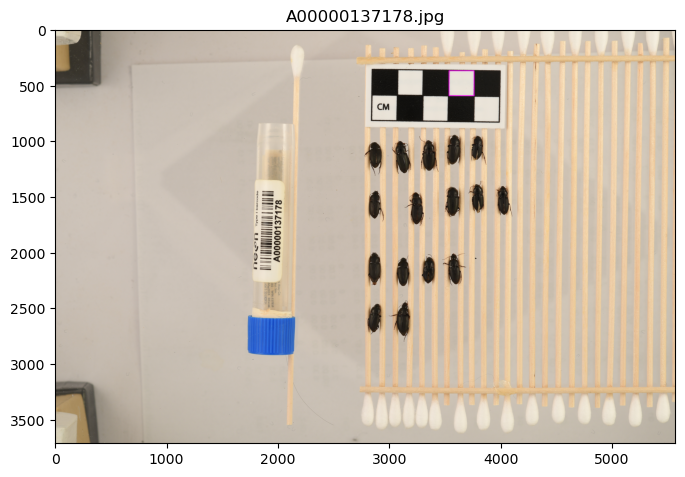

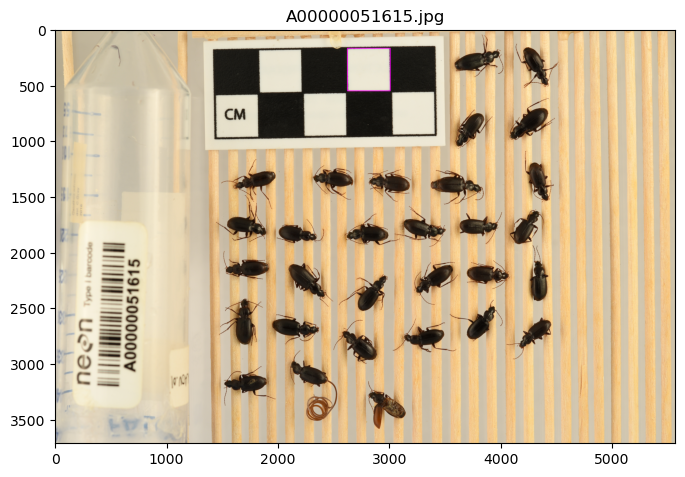

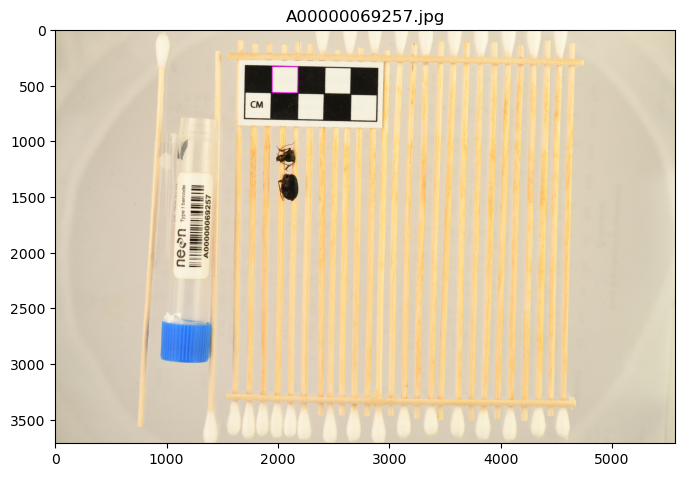

In [ ]:
import csv
n=0
result = []
for image in gp_ims[0:10] : 
    try:
        im = cv2.imread(gp_imdir/image)
        im = cv2.cvtColor(im, cv2.COLOR_RGB2BGR)
        
        gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gray, 50, 125, 3)
    
        contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
      
    
        max_avg_color = -1
        best_bbox = None
        
    
        for contour in contours:
            
            x, y, w, h = cv2.boundingRect(contour)
    
            if w > 200 and h > 200:
                roi = im[y:y+h, x:x+w]
                # cv2.rectangle(im, (x, y), (x + w, y + h), (255, 0, 255), 5) 
                if check_close_to_white_square(roi):
                    roi_normalized = roi / 255.0
                    mean_color = np.mean(roi_normalized, axis=(0, 1))
                    
                    # Convert the mean_color to a single value representing brightness (average across R, G, B)
                    mean_brightness = np.mean(mean_color)
                    
                    if mean_brightness > max_avg_color:
                        best_bbox = (x, y, w, h)
                        max_avg_color = mean_brightness
    
        if best_bbox:
            x, y, w, h = best_bbox
            # print(f"width, height:{w}, {h}")
            result.append((image, np.max([w, h])))
            cv2.rectangle(im, (x, y), (x + w, y + h), (255, 0, 255), 5) 
        else:
            # print('bbox is not found')
            n += 1
    except Exception as e:
        print(e)
    
    plt.figure(figsize=(8,6))
    plt.title(image)
    plt.imshow(im)
    plt.show()
print('total not found', n)




In [6]:
import csv
# Specify the CSV file name
csv_file = './results__px_cm.csv'

# Save the result list to a CSV file
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['image', 'px_to_cm'])  # Header
    for row in result:
        writer.writerow(row)